In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
red = pd.read_csv('datasets/winequality-red.csv', delimiter = ';')

In [5]:
white = pd.read_csv('datasets/winequality-white.csv', delimiter = ';')

In [7]:
red.shape

(1599, 12)

In [8]:
white.shape

(4898, 12)

In [9]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
red['target'] = 0
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
white['target'] = 1
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [17]:
df = pd.concat([red, white])

In [18]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:12]
y = df.iloc[:,12]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022, shuffle = True)

In [22]:
## 데이터 전처리 및 스케일링 X

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
#tqdm으로 모델이 돌아가고 있는지 확인 가능

hist = []

for k in tqdm(range(3,50)):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')
    
    hist.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:06<00:00,  7.36it/s]


In [26]:
np.argmax(hist)

4

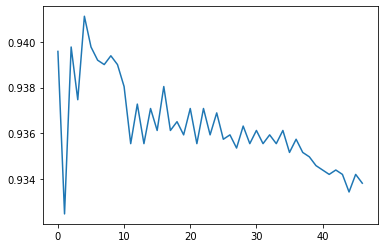

In [27]:
plt.plot(hist)

In [28]:
hist[4]

0.9411214555415709

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    
    print('정확도 : {}'.format(accuracy_score(y_test, y_pred)))
    print('정밀도 : {}'.format(precision_score(y_test, y_pred)))
    print('재현율 : {}'.format(recall_score(y_test, y_pred)))

In [31]:
print_score(y_test, y_pred)

정확도 : 0.9246153846153846
정밀도 : 0.9581589958158996
재현율 : 0.9404517453798767


In [32]:
## 데이터 전처리

In [34]:
df[df.duplicated()].sum()

fixed acidity             8493.100000
volatile acidity           376.040000
citric acid                375.770000
residual sugar            8506.800000
chlorides                   62.462000
free sulfur dioxide      38528.000000
total sulfur dioxide    144932.500000
density                   1171.616240
pH                        3755.390000
sulphates                  614.190000
alcohol                  12043.266667
quality                   6969.000000
target                     937.000000
dtype: float64

In [35]:
df.loc[df.duplicated()==True,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,1
4850,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,1
4851,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,1
4856,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,1


In [36]:
df = df.drop_duplicates(keep='first')

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [39]:
x = df.iloc[:,0:12]
y = df.iloc[:,12]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022, shuffle = True)

hist1 = []

for k in tqdm(range(3,50)):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')
    
    hist1.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:05<00:00,  9.24it/s]


In [40]:
np.argmax(hist1)

2

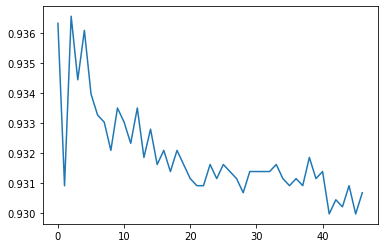

In [41]:
plt.plot(hist1)

In [43]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

def print_score(y_true, y_pred):
    
    print('정확도 : {}'.format(accuracy_score(y_test, y_pred)))
    print('정밀도 : {}'.format(precision_score(y_test, y_pred)))
    print('재현율 : {}'.format(recall_score(y_test, y_pred)))
    
print_score(y_test, y_pred)

정확도 : 0.9379699248120301
정밀도 : 0.957286432160804
재현율 : 0.9596977329974811
